In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter, butter, filtfilt

In [28]:
df=pd.read_csv('/Users/divayanshisharama/Desktop/Time series/lab6/Electric_Production.csv')
df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [29]:
df.columns

Index(['DATE', 'IPG2211A2N'], dtype='object')

In [30]:
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)


In [31]:
# Handle missing values (forward fill)
df.fillna(method='ffill', inplace=True)


/var/folders/85/phytw3ld4rd58ftvvppyg0ym0000gn/T/ipykernel_16318/1417222194.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


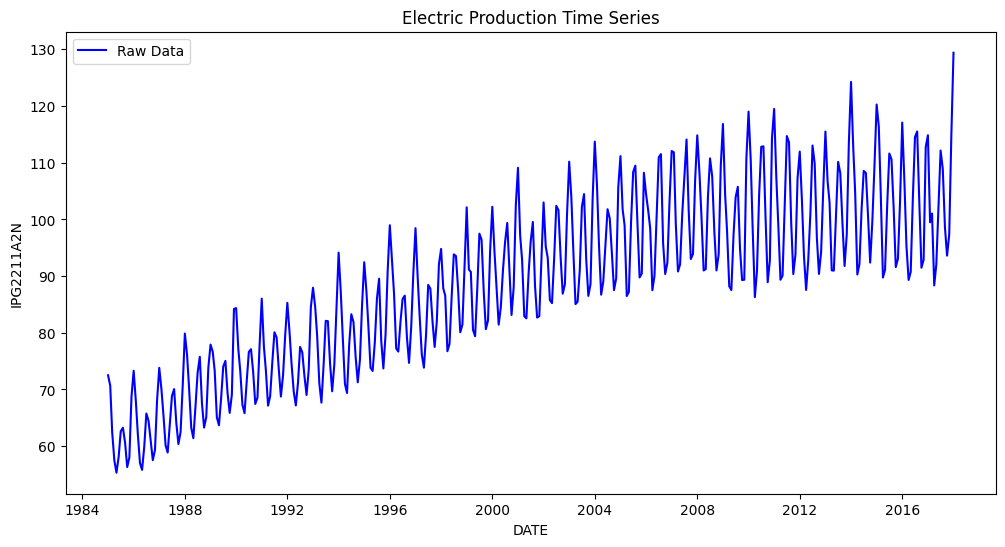

In [19]:
# Plot raw time series
plt.figure(figsize=(12,6))
plt.plot(df, label='Raw Data', color='blue')
plt.title('Electric Production Time Series')
plt.xlabel('DATE')
plt.ylabel('IPG2211A2N')
plt.legend()
plt.show()

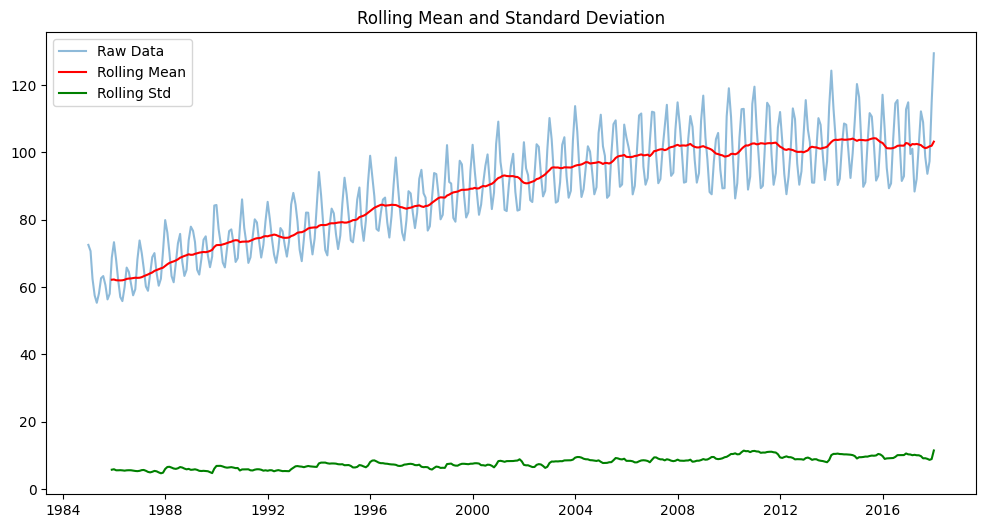

In [20]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()

plt.figure(figsize=(12,6))
plt.plot(df, label='Raw Data', alpha=0.5)
plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.plot(rolling_std, label='Rolling Std', color='green')
plt.title('Rolling Mean and Standard Deviation')
plt.legend()
plt.show()

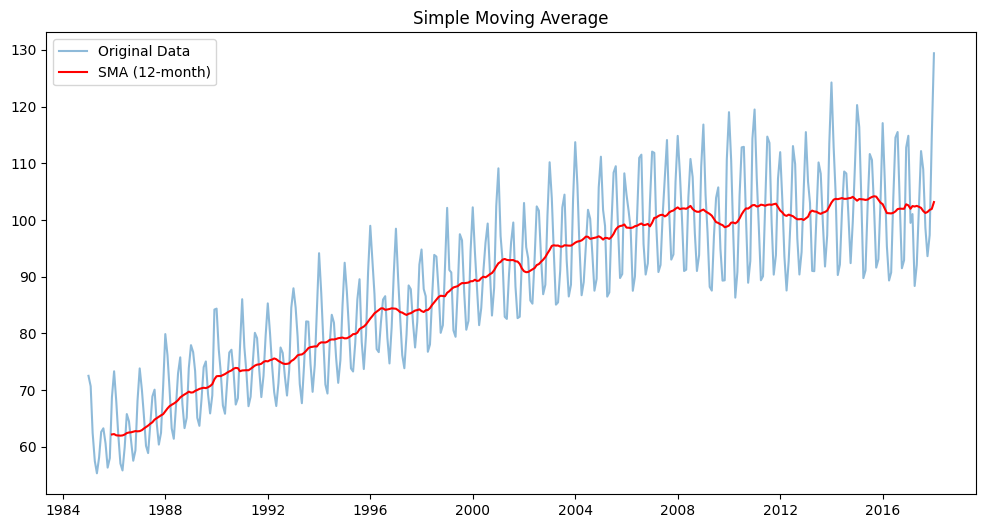

In [21]:
# Moving Average Filter
def moving_average(series, window_size):
    return series.rolling(window=window_size).mean()

sma_12 = moving_average(df, 12)
plt.figure(figsize=(12,6))
plt.plot(df, label='Original Data', alpha=0.5)
plt.plot(sma_12, label='SMA (12-month)', color='red')
plt.title('Simple Moving Average')
plt.legend()
plt.show()


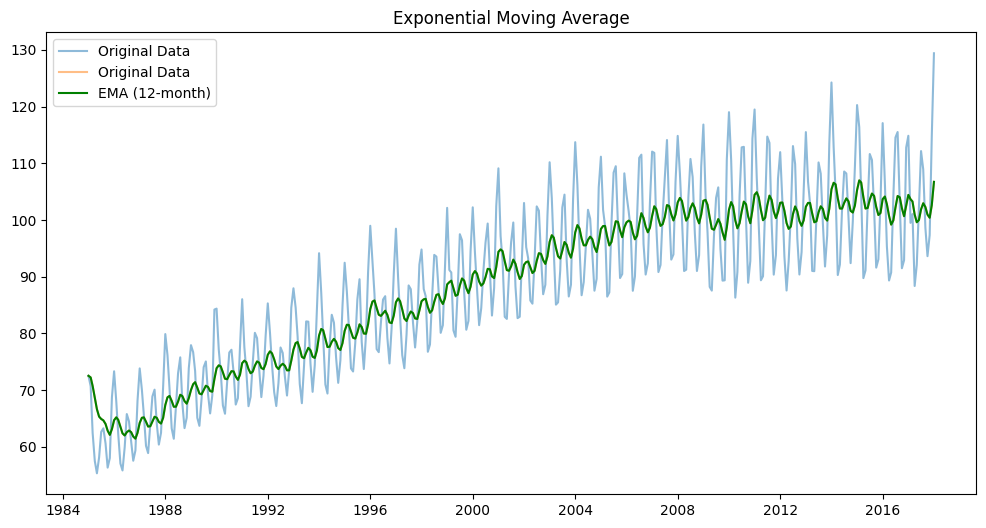

In [22]:
# Exponential Moving Average (EMA)
df['EMA_12'] = df.ewm(span=12, adjust=False).mean()
plt.figure(figsize=(12,6))
plt.plot(df, label='Original Data', alpha=0.5)
plt.plot(df['EMA_12'], label='EMA (12-month)', color='green')
plt.title('Exponential Moving Average')
plt.legend()


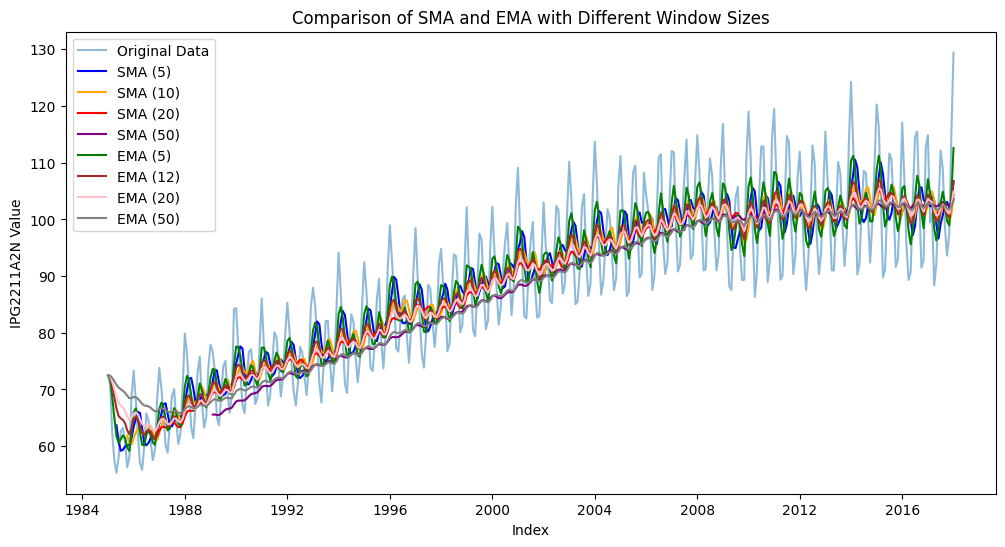

In [ ]:
import matplotlib.pyplot as plt

df['SMA_5'] = df['IPG2211A2N'].rolling(window=5).mean()
df['SMA_10'] = df['IPG2211A2N'].rolling(window=10).mean()
df['SMA_20'] = df['IPG2211A2N'].rolling(window=20).mean()
df['SMA_50'] = df['IPG2211A2N'].rolling(window=50).mean()

df['EMA_5'] = df['IPG2211A2N'].ewm(span=5, adjust=False).mean()
df['EMA_12'] = df['IPG2211A2N'].ewm(span=12, adjust=False).mean()
df['EMA_20'] = df['IPG2211A2N'].ewm(span=20, adjust=False).mean()
df['EMA_50'] = df['IPG2211A2N'].ewm(span=50, adjust=False).mean()

plt.figure(figsize=(12,6))
plt.plot(df['IPG2211A2N'], label='Original Data', alpha=0.5)
plt.plot(df['SMA_5'], label='SMA (5)', color='blue')
plt.plot(df['SMA_10'], label='SMA (10)', color='orange')
plt.plot(df['SMA_20'], label='SMA (20)', color='red')
plt.plot(df['SMA_50'], label='SMA (50)', color='purple')
plt.plot(df['EMA_5'], label='EMA (5)', color='green')
plt.plot(df['EMA_12'], label='EMA (12)', color='brown')
plt.plot(df['EMA_20'], label='EMA (20)', color='pink')
plt.plot(df['EMA_50'], label='EMA (50)', color='gray')

plt.title('Comparison of SMA and EMA with Different Window Sizes')
plt.xlabel('Index')
plt.ylabel('IPG2211A2N Value')
plt.legend(loc='best')
plt.show()


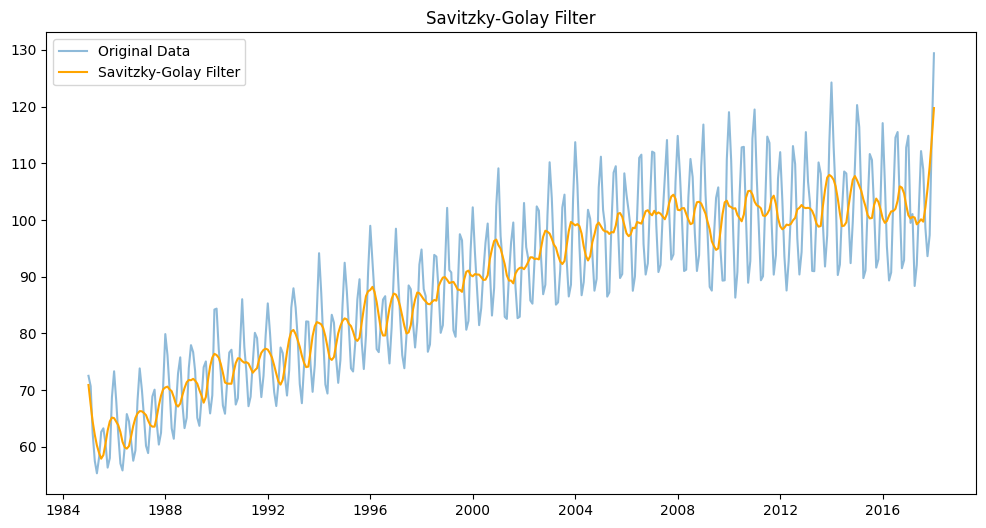

In [21]:

savgol_filtered = savgol_filter(df['IPG2211A2N'], window_length=11, polyorder=2)
plt.figure(figsize=(12,6))
plt.plot(df['IPG2211A2N'], label='Original Data', alpha=0.5)
plt.plot(df.index, savgol_filtered, label='Savitzky-Golay Filter', color='orange')
plt.title('Savitzky-Golay Filter')
plt.legend()
plt.show()

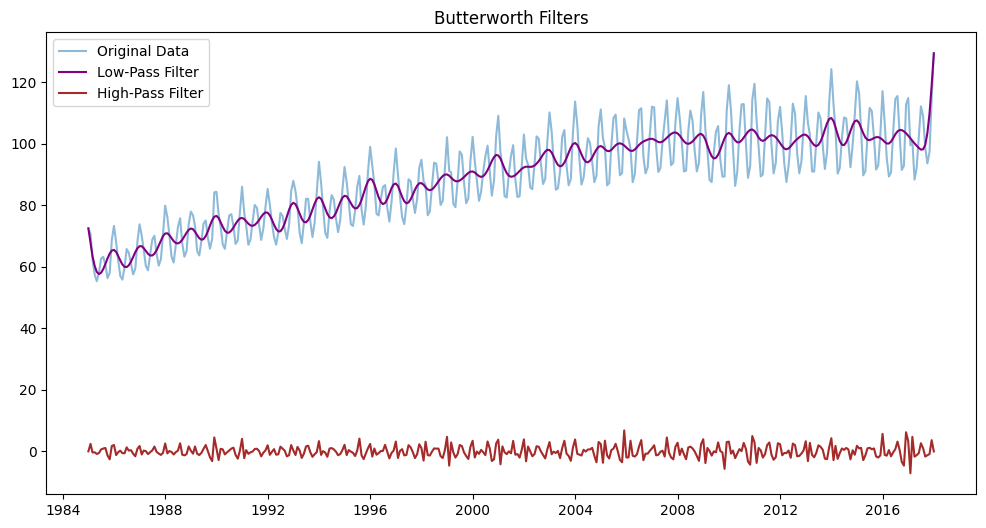

In [23]:
# Butterworth Filters
def butterworth_filter(series, cutoff, fs=1, order=4, filter_type='low'):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    return filtfilt(b, a, series)

low_pass = butterworth_filter(df['IPG2211A2N'], cutoff=0.1, filter_type='low')
high_pass = butterworth_filter(df['IPG2211A2N'], cutoff=0.2, filter_type='high')

plt.figure(figsize=(12,6))
plt.plot(df.index, df['IPG2211A2N'], label='Original Data', alpha=0.5)
plt.plot(df.index, low_pass, label='Low-Pass Filter', color='purple')
plt.plot(df.index, high_pass, label='High-Pass Filter', color='brown')
plt.title('Butterworth Filters')
plt.legend()
plt.show()

In [29]:
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd


def align_and_clean(original, filtered):
    
    if isinstance(filtered, np.ndarray):
        filtered = pd.Series(filtered, index=original.index[:len(filtered)])
    
    
    original_clean = original.dropna()
    filtered_clean = filtered.dropna()

    
    min_length = min(len(original_clean), len(filtered_clean))
    return original_clean.iloc[:min_length], filtered_clean.iloc[:min_length]


df_clean = df['IPG2211A2N'].dropna()


df_sma, sma_12_clean = align_and_clean(df_clean, sma_12)
df_ema, ema_12_clean = align_and_clean(df_clean, df['EMA_12'])
df_sg, sg_clean = align_and_clean(df_clean, savgol_filtered)
df_lp, lp_clean = align_and_clean(df_clean, low_pass)
df_hp, hp_clean = align_and_clean(df_clean, high_pass)


mse_sma = mean_squared_error(df_sma, sma_12_clean)
mse_ema = mean_squared_error(df_ema, ema_12_clean)
mse_sg = mean_squared_error(df_sg, sg_clean)
mse_lp = mean_squared_error(df_lp, lp_clean)
mse_hp = mean_squared_error(df_hp, hp_clean)


print(f"MSE (SMA): {mse_sma:.4f}")
print(f"MSE (EMA): {mse_ema:.4f}")
print(f"MSE (Savitzky-Golay): {mse_sg:.4f}")
print(f"MSE (Low-Pass Butterworth): {mse_lp:.4f}")
print(f"MSE (High-Pass Butterworth): {mse_hp:.4f}")


MSE (SMA): 59.2290
MSE (EMA): 50.3103
MSE (Savitzky-Golay): 59.6145
MSE (Low-Pass Butterworth): 51.8024
MSE (High-Pass Butterworth): 8112.8458
